# 1.5 Text Mining

In [3]:
%pip install textblob


     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     -------------------------------------  41.0/42.0 kB 991.0 kB/s eta 0:00:01
     -------------------------------------- 42.0/42.0 kB 406.8 kB/s eta 0:00:00
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 57.6/57.6 kB 3.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ------------- -------------------------- 204.8/626.3 kB 4.2 MB/s eta 0:00:01
   ------------------------- -------------- 399.4/626.3 kB 4.2 MB/s eta 0:00:01
   ---------------------------------------  624.6/626.3 kB 4.9 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 3.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB 5.2 MB/s eta 0:00:01
   ------------- -------------------------- 0.5/1.5 MB 6.2 MB/s eta 0:00:01
   

In [5]:
%pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 262.6 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/294.9 kB 217.9 kB/s eta 0:00:02
   -------- ------------------------------ 61.4/294.9 kB 297.7 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/294.9 kB 514.3 kB/s eta 0:00:01
   ------------------------------- ------ 245.8/294.9 kB 838.1 kB/s eta 0:00:01
   -------------------------------------- 294.9/294.9 kB 867.9 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [6]:
from textblob import TextBlob 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from collections import Counter
sns.set()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bhimc\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bhimc\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\bhimc\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


In [8]:
# Import txt file

with open('Alice_article_Wiki.txt', 'r', errors='ignore') as file: 
   data = file.read().replace( '\n', ' ')

In [9]:
# Sentence tokenization

from nltk.tokenize import sent_tokenize
tokenized_sent = sent_tokenize(data)
print(tokenized_sent) 

["    Alice in Wonderland (franchise) - Wikipedia                                     Jump to content        Main menu      Main menu move to sidebar hide    \t\tNavigation \t   Main pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonate      \t\tContribute \t   HelpLearn to editCommunity portalRecent changesUpload file                    Search            Search                              Create account  Log in         Personal tools       Create account Log in      \t\tPages for logged out editors learn more    ContributionsTalk                             Contents move to sidebar hide     (Top)      1Films    Toggle Films subsection      1.1Animated films      1.1.1Alice in Wonderland          1.2Live-action films      1.2.1Alice in Wonderland        1.2.2Alice Through the Looking Glass            2TV series    Toggle TV series subsection      2.1Adventures in Wonderland        2.2Once Upon a Time in Wonderland        2.3Alice's Wonderland Bakery          3Video g

In [10]:
# Word tokenization

from nltk.tokenize import word_tokenize
tokenized_word = word_tokenize(data)
print(tokenized_word) 

['Alice', 'in', 'Wonderland', '(', 'franchise', ')', '-', 'Wikipedia', 'Jump', 'to', 'content', 'Main', 'menu', 'Main', 'menu', 'move', 'to', 'sidebar', 'hide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'usDonate', 'Contribute', 'HelpLearn', 'to', 'editCommunity', 'portalRecent', 'changesUpload', 'file', 'Search', 'Search', 'Create', 'account', 'Log', 'in', 'Personal', 'tools', 'Create', 'account', 'Log', 'in', 'Pages', 'for', 'logged', 'out', 'editors', 'learn', 'more', 'ContributionsTalk', 'Contents', 'move', 'to', 'sidebar', 'hide', '(', 'Top', ')', '1Films', 'Toggle', 'Films', 'subsection', '1.1Animated', 'films', '1.1.1Alice', 'in', 'Wonderland', '1.2Live-action', 'films', '1.2.1Alice', 'in', 'Wonderland', '1.2.2Alice', 'Through', 'the', 'Looking', 'Glass', '2TV', 'series', 'Toggle', 'TV', 'series', 'subsection', '2.1Adventures', 'in', 'Wonderland', '2.2Once', 'Upon', 'a', 'Time', 'in', 'Wonderland', '2.3Alice', "'s", 'Wonderl

In [11]:
from nltk.probability import FreqDist
dist_words = FreqDist(tokenized_word)
print(dist_words) 

<FreqDist with 1488 samples and 4753 outcomes>


In [12]:
dist_words.most_common(10)

[('(', 224),
 (')', 224),
 ('Alice', 158),
 ('in', 157),
 ('the', 156),
 ('Wonderland', 120),
 (',', 117),
 ('The', 80),
 ('of', 72),
 ('.', 71)]

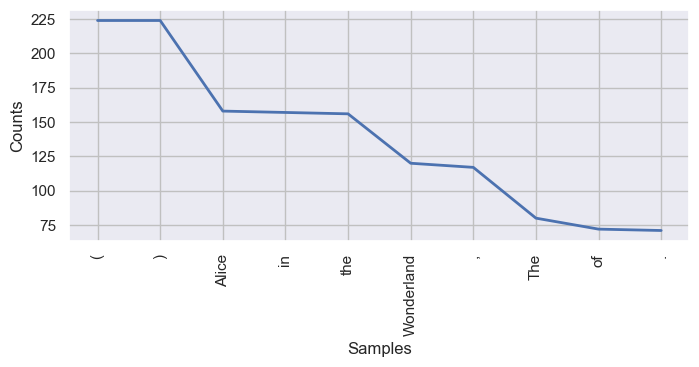

In [13]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words.plot(10,cumulative = False)
plt.show()

## Stop Word

In [14]:
# Defining stopwords

from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
print(stop_words)

{'most', 'not', 'out', "you'd", 'her', 'been', 'further', 'some', 'too', 'for', 'this', 'on', 'all', 'both', 'few', 'will', "couldn't", "hadn't", 'have', 'against', 'nor', 're', "you'll", 'did', "wouldn't", 'aren', "it's", 'are', "aren't", 'be', 'any', 'isn', 'because', 'your', 'it', 'such', 'no', 'yours', 'if', 'didn', 'doesn', 'how', 'himself', 'again', 'with', 'is', 'the', 'had', 'own', 'up', 'do', 'in', 'just', 'over', 'under', "won't", 'needn', 'an', 'off', 'were', 'so', 'only', 'ours', 'couldn', 'hasn', 'while', 't', 'down', 'mustn', 'm', 'theirs', 's', 'weren', 'shan', 'after', 'y', 'their', 'now', 'before', 'those', 'below', 'from', 'ma', 'herself', 'was', 'until', 'why', 'me', 'won', 'hers', 'am', 'his', 'more', 'we', 'what', 'of', 'there', "haven't", "mightn't", 'he', 'myself', 'can', "shan't", 'shouldn', 'during', 'has', 'here', 'when', "don't", 'don', 'between', 'themselves', "wasn't", 'same', 'that', "you've", 'through', 'into', 'ourselves', 'o', 'haven', 'above', 'and', "

In [15]:
# Removing stopwords in sentences

# filtered_sent = []
# for word in tokenized_sent:
#     if word not in stop_words:
#         filtered_sent.append(word)
# print("Tokenized Sentence:", tokenized_sent)
# print("Filterd Sentence:", filtered_sent)

In [16]:
# Removing stopwords in words

filtered_words = [] # creates an empty list
for word in tokenized_word:
    if word not in stop_words:
        filtered_words.append(word)

In [17]:
# Create a new FreqDist for filtered_words

dist_words_filter = FreqDist(filtered_words)
print(dist_words_filter)

<FreqDist with 1440 samples and 4008 outcomes>


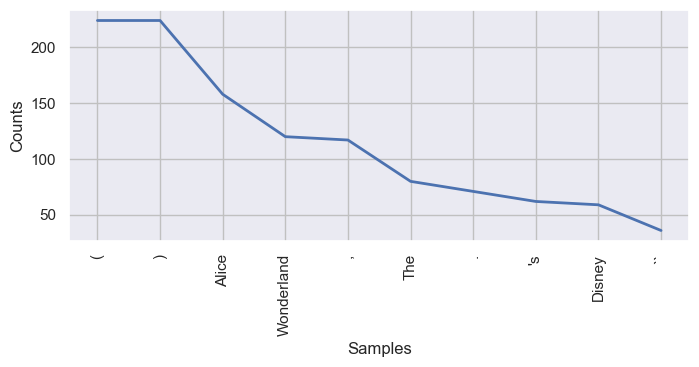

In [18]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words_filter.plot(10, cumulative = False)
plt.show()

In [19]:
dist_words_filter

FreqDist({'(': 224, ')': 224, 'Alice': 158, 'Wonderland': 120, ',': 117, 'The': 80, '.': 71, "'s": 62, 'Disney': 59, '``': 36, ...})

In [20]:
# Substitute all punctuations marks with a space 

sans_punc = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(filtered_words))

In [22]:
# Word tokenization

tokenized_word_2 = word_tokenize(sans_punc)
print(tokenized_word_2)

['Alice', 'Wonderland', 'franchise', 'Wikipedia', 'Jump', 'content', 'Main', 'menu', 'Main', 'menu', 'move', 'sidebar', 'hide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'usDonate', 'Contribute', 'HelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'file', 'Search', 'Search', 'Create', 'account', 'Log', 'Personal', 'tools', 'Create', 'account', 'Log', 'Pages', 'logged', 'editors', 'learn', 'ContributionsTalk', 'Contents', 'move', 'sidebar', 'hide', 'Top', 'Films', 'Toggle', 'Films', 'subsection', 'Animated', 'films', 'Alice', 'Wonderland', 'Live', 'action', 'films', 'Alice', 'Wonderland', 'Alice', 'Through', 'Looking', 'Glass', 'TV', 'series', 'Toggle', 'TV', 'series', 'subsection', 'Adventures', 'Wonderland', 'Once', 'Upon', 'Time', 'Wonderland', 'Alice', 's', 'Wonderland', 'Bakery', 'Video', 'games', 'Toggle', 'Video', 'games', 'subsection', 'Alice', 'Wonderland', 'Kingdom', 'Hearts', 'series', 'Alice', 'Wonderland', 'D

In [23]:
# Create a new FreqDist

dist_words_filter_2 = FreqDist(tokenized_word_2)

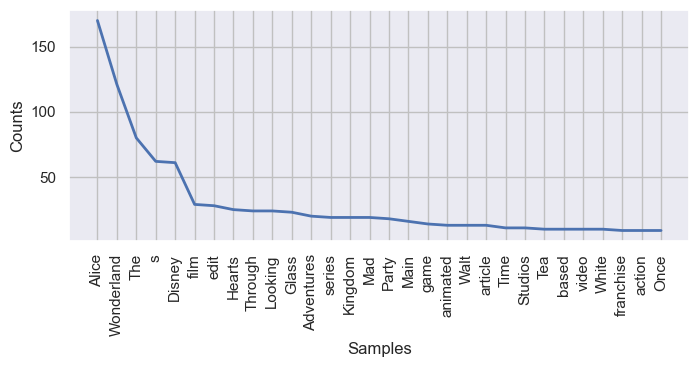

In [24]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words_filter_2.plot(30, cumulative = False)
plt.show()

In [25]:
dist_words_filter_2.most_common(20)

[('Alice', 170),
 ('Wonderland', 121),
 ('The', 80),
 ('s', 62),
 ('Disney', 61),
 ('film', 29),
 ('edit', 28),
 ('Hearts', 25),
 ('Through', 24),
 ('Looking', 24),
 ('Glass', 23),
 ('Adventures', 20),
 ('series', 19),
 ('Kingdom', 19),
 ('Mad', 19),
 ('Party', 18),
 ('Main', 16),
 ('game', 14),
 ('animated', 13),
 ('Walt', 13)]

## POS tags with TextBlob

In [26]:
new_stopwords = ["And", "Then", 'n', 't', 's', 'The']

In [27]:
filtered = []
for word in tokenized_word_2:
    if word not in new_stopwords:
        filtered.append(word)

In [28]:
%%time
text = TextBlob(str(filtered))

CPU times: total: 0 ns
Wall time: 4.56 ms


In [30]:
tags_list = text.tags

In [31]:
tags_list

[('[', 'JJ'),
 ("'Alice", 'NNP'),
 ("'", 'POS'),
 ("'Wonderland", 'NNP'),
 ("'", 'POS'),
 ("'Wikipedia", 'NNP'),
 ("'", 'POS'),
 ("'Jump", 'NNP'),
 ("'", 'POS'),
 ("'content", 'NNP'),
 ("'", 'POS'),
 ("'menu", 'NNP'),
 ("'", 'POS'),
 ("'menu", 'NNP'),
 ("'", 'POS'),
 ("'move", 'NNP'),
 ("'", 'POS'),
 ("'sidebar", 'NNP'),
 ("'", 'POS'),
 ("'hide", 'NNP'),
 ("'", 'POS'),
 ("'Navigation", 'NN'),
 ("'pageContentsCurrent", 'NNP'),
 ("'", 'POS'),
 ("'eventsRandom", 'NNP'),
 ("'", 'POS'),
 ("'articleAbout", 'IN'),
 ("'WikipediaContact", 'NNP'),
 ("'", 'POS'),
 ("'usDonate", 'NNP'),
 ("'", 'POS'),
 ("'HelpLearn", 'NNP'),
 ("'", 'POS'),
 ("'editCommunity", 'NNP'),
 ("'", 'POS'),
 ("'portalRecent", 'NNP'),
 ("'", 'POS'),
 ("'file", 'IN'),
 ("'Search", 'NNP'),
 ("'", 'POS'),
 ("'Search", 'NNP'),
 ("'", 'POS'),
 ("'Create", 'NNP'),
 ("'", 'POS'),
 ("'account", 'NNP'),
 ("'", 'POS'),
 ("'Log", 'NNP'),
 ("'", 'POS'),
 ("'Personal", 'NNP'),
 ("'", 'POS'),
 ("'tools", 'NNS'),
 ("'", 'POS'),
 ("'Create

In [32]:
df_text = pd.DataFrame(tags_list)
df_text.columns = ['Words', "Word type"]

In [33]:
df_t = df_text.groupby('Word type').count().reset_index()
top20 = df_t.nlargest(20, 'Words')

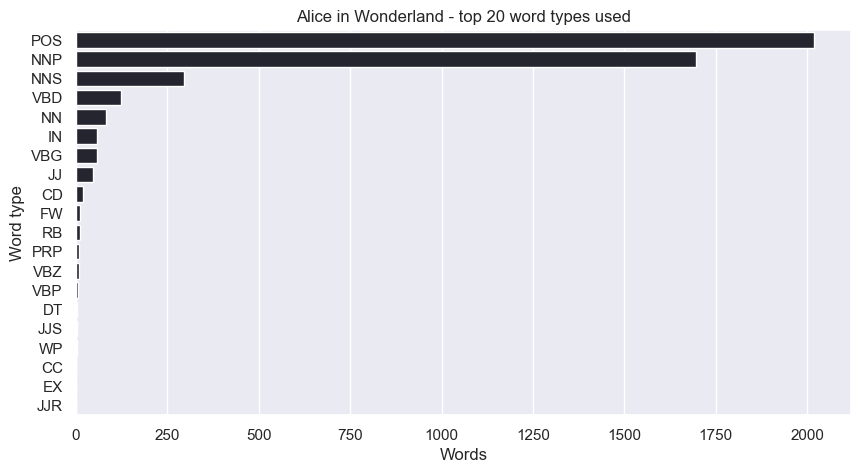

In [34]:
plt.figure(figsize = (10, 5))
with sns.dark_palette("xkcd:blue", 20):
    sns.barplot(x = "Words", y = "Word type",
    saturation = 0.9, data = top20).set_title("Alice in Wonderland - top 20 word types used")

In [35]:
# def word_analysis(word_type):
#     filtered = [row for row in my_list if str(word_type) in row[1]]
#     print("filtered for " + word_type)
#     df = pd.DataFrame(filtered)
#     df.columns = ["Word", "Occurences"]
#     x=df.groupby('Word').count().reset_index()
#     y=x.sort_values(by=['Occurences'], ascending=False)
#     top10=y.nlargest(10, 'Occurences')
#     plt.figure(figsize=(10, 5))
#     sns.barplot(x="Word", y="Occurences", palette="rocket", saturation=0.9, data=top10).set_title("Lord of the rings - most frequently used "+ word_type +" type word")

### Nouns

In [36]:
df = df_text[(df_text['Word type'] == "NN") | (df_text['Word type'] == "NNS") | (df_text['Word type'] == "NNP")]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending=False)
top10 = y.nlargest(10, 'Occurences')

In [37]:
top10

,Word,Occurences
16,'Alice,170
661,'Wonderland,121
155,'Disney,61
752,'film,29
737,'edit,28
267,'Hearts,25
238,'Glass,23
10,'Adventures,20
381,'Mad,19
855,'series,19


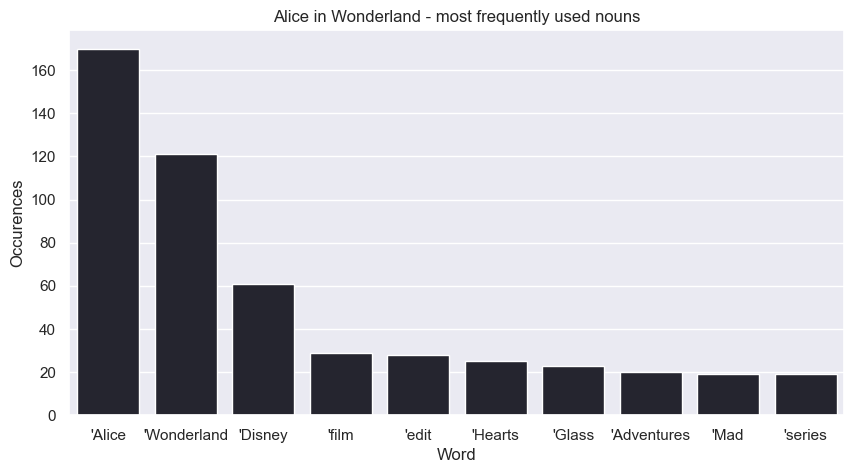

In [38]:
plt.figure(figsize=(10, 5))
with sns.dark_palette("xkcd:blue", 10):
    sns.barplot(x="Word", y="Occurences",
    saturation=0.9, data = top10).set_title("Alice in Wonderland - most frequently used nouns")

## Verbs

In [39]:
df = df_text[(df_text['Word type'] == "VB")  | (df_text['Word type'] == "VBD")]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending=False)
top10 = y.nlargest(10, 'Occurences')

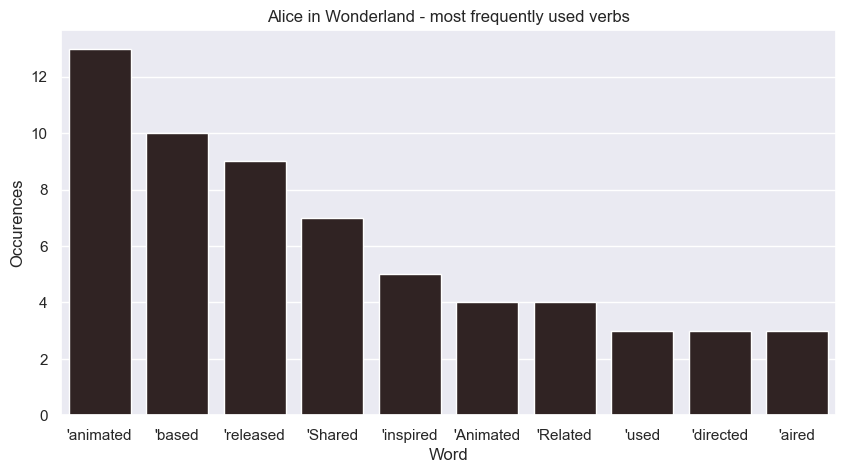

In [41]:
plt.figure(figsize = (10, 5))
with sns.dark_palette("xkcd:red", 10):
    sns.barplot(x = "Word", y = "Occurences",
    saturation = 0.9, data = top10).set_title("Alice in Wonderland - most frequently used verbs")

# Adjectives

In [42]:
df = df_text[df_text['Word type'] == "JJ"]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by=['Occurences'], ascending=False)
top10 = y.nlargest(10, 'Occurences')

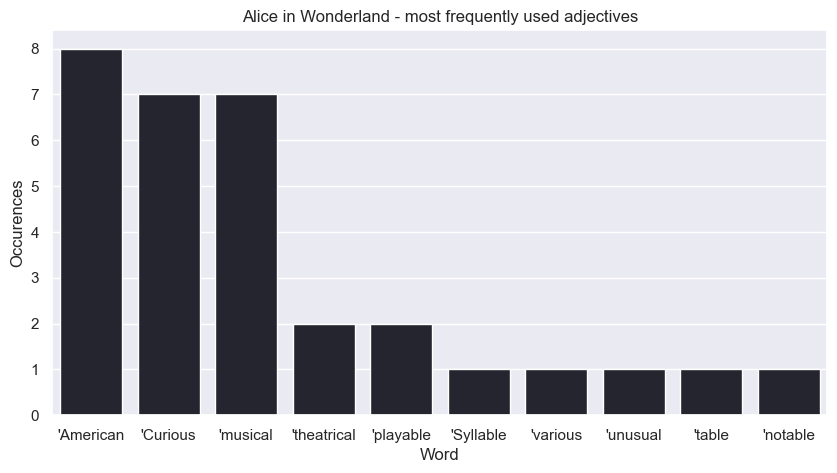

In [43]:
plt.figure(figsize=(10, 5))
with sns.dark_palette("xkcd:blue", 10):
    sns.barplot(x="Word", y="Occurences",
    saturation=0.9, data=top10).set_title("Alice in Wonderland - most frequently used adjectives")

# Creating character occurences

In [44]:
listToStr = ' '.join([str(elem) for elem in filtered])
 
print(listToStr)

Alice Wonderland franchise Wikipedia Jump content Main menu Main menu move sidebar hide Navigation Main pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonate Contribute HelpLearn editCommunity portalRecent changesUpload file Search Search Create account Log Personal tools Create account Log Pages logged editors learn ContributionsTalk Contents move sidebar hide Top Films Toggle Films subsection Animated films Alice Wonderland Live action films Alice Wonderland Alice Through Looking Glass TV series Toggle TV series subsection Adventures Wonderland Once Upon Time Wonderland Alice Wonderland Bakery Video games Toggle Video games subsection Alice Wonderland Kingdom Hearts series Alice Wonderland Disney Infinity series Disney Magic Kingdoms Theme park attractions rides Toggle Theme park attractions rides subsection Alice Wonderland Maze Alice Curious Labyrinth Mad Tea Party Alice Wonderland ride Mad T Party Stage version Toggle Stage version subsection Alice Wonderland Jr 

In [45]:
# Create a count for the main characters

all_counts = Counter(re.sub(r'\W+', ' ', listToStr).split())

In [46]:
chars = pd.read_csv("Alice_characters.csv", index_col = 0)

In [47]:
chars.head()

,character
0,Alice
1,The White Rabbit
2,The Mouse
3,The Dodo
4,The Lory


In [48]:
# Replace names with aliases

chars['character'] = chars['character'].replace('Bill the Lizard','Bill')
chars['character'] = chars['character'].replace('The Queen of Hearts','Queen')
chars['character'] = chars['character'].replace('The King of Hearts','King')
chars['character'] = chars['character'].replace('The Knave of Hearts','Knave')

In [49]:
chars['character_alias'] = chars['character'].apply(lambda x: x.rsplit(' ', 1)[-1])

In [50]:
char_list = chars['character_alias'].to_list()

In [51]:
dict_of_counts = {d : all_counts[d] for d in char_list}

In [52]:
dict_of_counts

{'Alice': 170,
 'Rabbit': 9,
 'Mouse': 6,
 'Dodo': 1,
 'Lory': 0,
 'Eaglet': 0,
 'Duck': 3,
 'Pat': 1,
 'Bill': 5,
 'Puppy': 1,
 'Caterpillar': 3,
 'Duchess': 1,
 'Cat': 3,
 'Hatter': 5,
 'Hare': 3,
 'Dormouse': 1,
 'Queen': 5,
 'King': 5,
 'Knave': 1,
 'Gryphon': 1,
 'Turtle': 2}

In [53]:
# Search for the names from the list in the dictionary

dct = {v:[k] for v,k in dict_of_counts.items()}  
df = pd.DataFrame(dct)

In [54]:
df = df.transpose().reset_index()

In [55]:
df.dtypes

index    object
0         int64
dtype: object

In [56]:
df

,index,0
0,Alice,170
1,Rabbit,9
2,Mouse,6
3,Dodo,1
4,Lory,0
5,Eaglet,0
6,Duck,3
7,Pat,1
8,Bill,5
9,Puppy,1


In [57]:
df.rename(columns = {"index":"Character", 0:"Times mentioned"}, inplace = True)

In [58]:
df

,Character,Times mentioned
0,Alice,170
1,Rabbit,9
2,Mouse,6
3,Dodo,1
4,Lory,0
5,Eaglet,0
6,Duck,3
7,Pat,1
8,Bill,5
9,Puppy,1


In [59]:
df.shape

(21, 2)

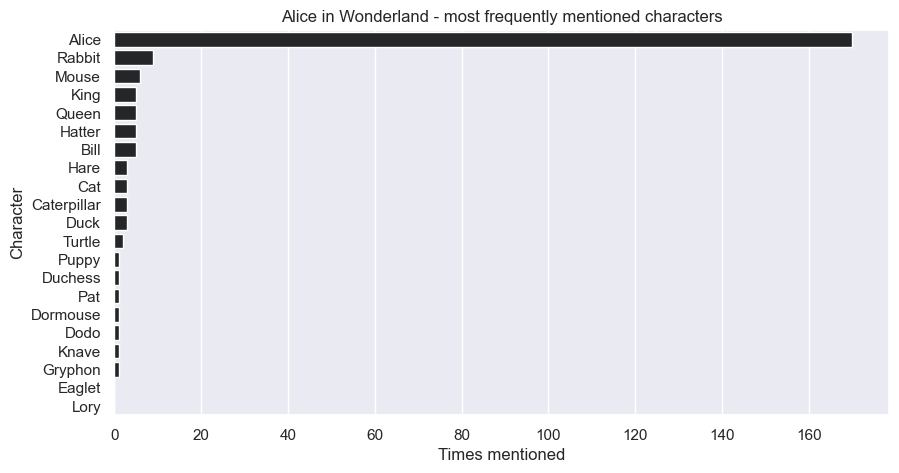

In [60]:
plt.figure(figsize=(10, 5))
with sns.dark_palette("#79C", 27):
    sns.barplot(x = "Times mentioned", y = "Character",
    saturation=0.9, data = df.sort_values("Times mentioned", ascending = False)).set_title("Alice in Wonderland - most frequently mentioned characters")

In [61]:
chars.to_csv("characters_alice.csv")

# Sentiment Analysis

In [62]:
text_sent = TextBlob(str(filtered))
print(text_sent.sentiment)

Sentiment(polarity=-0.002394995877138736, subjectivity=0.43938371813371824)
